In [1]:
!pip install keras-tuner
import tensorflow as tf
import numpy as np
from tensorflow import keras

     |████████████████████████████████| 97 kB 3.4 MB/s 


In [2]:
from keras.layers import BatchNormalization, Dropout, MaxPool2D

In [3]:
#here we created the object of our data
fashion_mnist=keras.datasets.fashion_mnist
#in this fashion mnist we had to predict 10 labels

In [4]:
#our data was already seperated in train and test so we load data
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
#since in our data there is many pixesl eg: 1,2,255,0 so in order to scale it down we would be dividing it by 255.0 becz max pixels are 255
#and dividing it by 255 means now our data would be ranging between 0-1 as it helps to train our model quickly
#scaling down our pixels in image
train_images=train_images/255.0
test_images=test_images/255.0


In [6]:
#train_images[0]

In [7]:
#if you donot convert your image into 4 dimension so when you are building the convo2d layer so it will be expecting 4d image so will give you error
#so now here it is confirmed that we need to convert it into 4d image
#in data augumentation we resized it to (1,600,2560,3) we put 1 in start where 1 shows your batch size since we were having only 1 image so gave 1
#but in this data we have got 60000 data images so surely we want all of it to be trained and now our batch would be 60000 so reshaping would be like this:
#(6000,28,28,1)
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
#train_images[0]

In [ ]:
#kernal_size is the size of our filter matrix
#difference between conv2d and dense cond2d is used to map those filters on our image and compute it where the dense layer helps to make fully connected nueral network by connecting the vectors 
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [8]:
#The Keras Tuner is a library that helps you pick the optimal set of hyperparameters for your TensorFlow program.
#Kerastuner gives you flexibility to tune the number of layers as well. Apart from randomsearch there are tuners in keras which can use bayesian approach to narrow down the parameter search space.
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
#objective is our aim it could be val_loss
#max_trials is total no of times it is gonna perfrom hp
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 02m 22s]
val_accuracy: 0.9167222380638123

Best val_accuracy So Far: 0.9167222380638123
Total elapsed time: 00h 12m 11s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        102464    
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 4,069,450
Trainable params: 4,069,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#initial_epoch is kai mai kehe rha hn ka isse pehle maine 10 epoch chalaye thaay and now i am running 20 epochs tu jo pehle 10 epoch chalaye thaay
#uske baad se shoro kro tu pehle i ran for 10 epoch so now initial_epoch=10 tu ab ye 10 epoch ka baad se chale ga it imporoves the accuracy overall
model.fit(train_images, train_labels, epochs=20, validation_split=0.3, initial_epoch=10)

Epoch 11/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0437 - accuracy: 0.9832 - val_loss: 0.4001 - val_accuracy: 0.9076
Epoch 12/20
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0327 - accuracy: 0.9888 - val_loss: 0.4595 - val_accuracy: 0.9074
Epoch 13/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.5073 - val_accuracy: 0.9108
Epoch 14/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.5097 - val_accuracy: 0.9107
Epoch 15/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 0.6410 - val_accuracy: 0.9089
Epoch 16/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.6385 - val_accuracy: 0.9090
Epoch 17/20
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7474 - accuracy: 0.9040

Test accuracy: 0.9039999842643738


In [ ]:


probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
test_images = test_images.reshape(-1,28,28)
test_images.shape

(10000, 28, 28)

In [ ]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

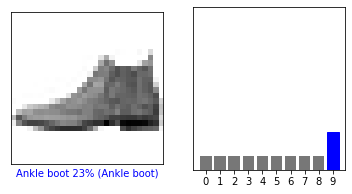

In [ ]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

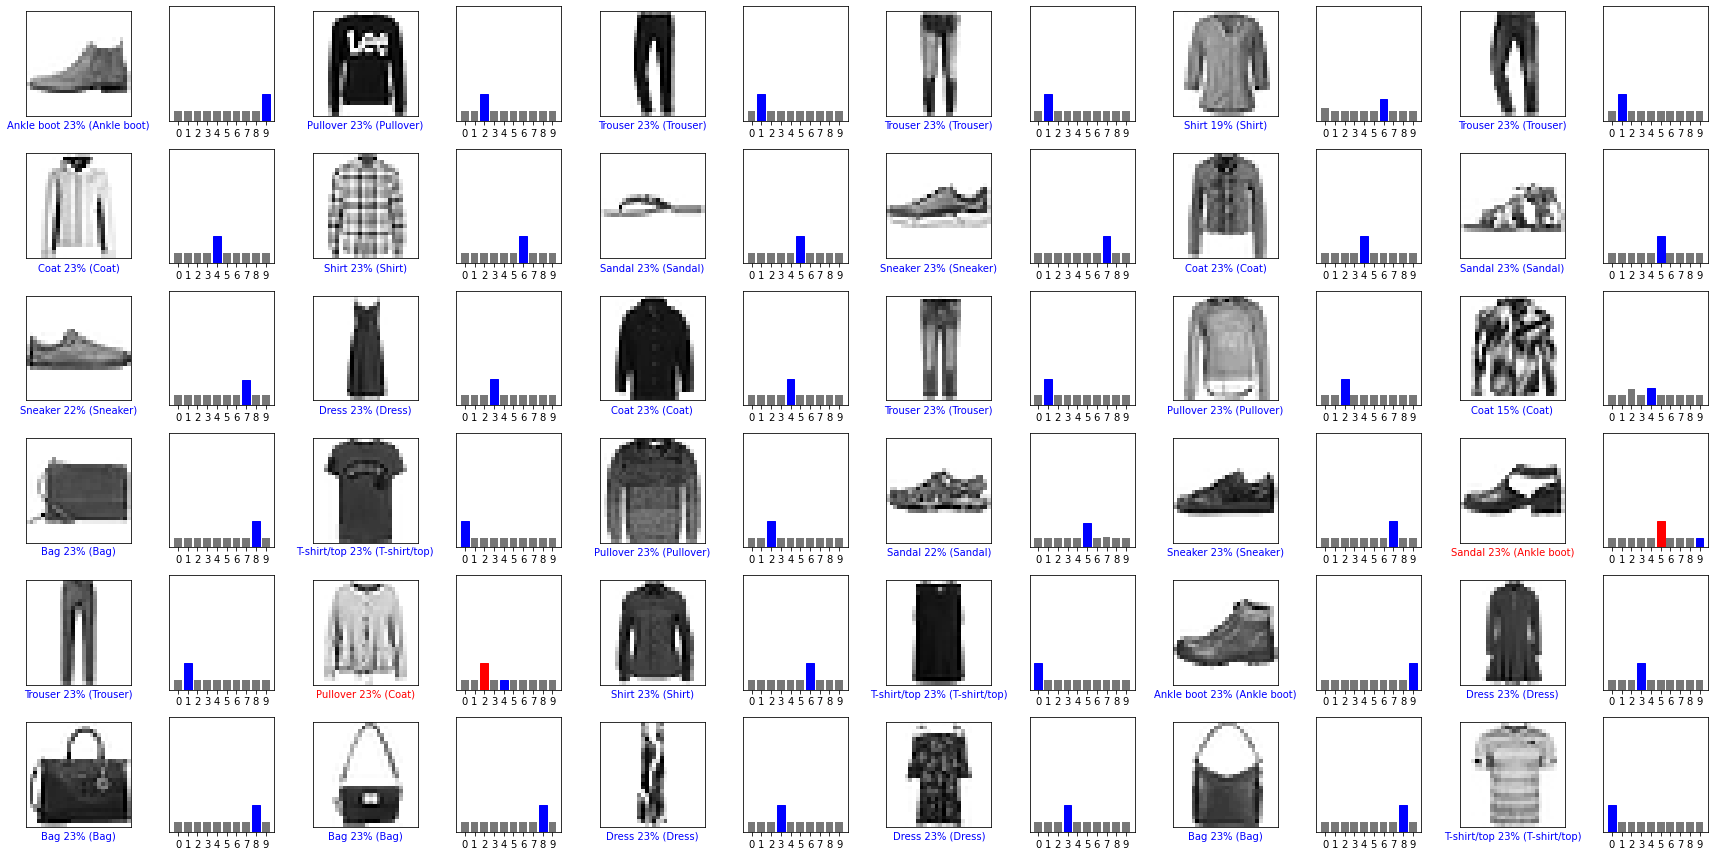

In [ ]:
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#doing again with more changes

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'

    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-5])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search_1=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_1_1',project_name="Mnist Fashion_1_1")

In [ ]:
tuner_search_1.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 02m 53s]
val_accuracy: 0.8847777843475342

Best val_accuracy So Far: 0.8847777843475342
Total elapsed time: 00h 16m 19s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search_1.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 80)        800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        23072     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3

In [ ]:
#now doing with more extra parameters such as batchnormalization and dropout and maxpooling
#bacth normalization is a process just like the dropout in nn as it normalizes the layer which means that the layer tends to work independently
#and the use or dropout is reduced when we use batchnormalizer
#Batch normalization, or batchnorm for short, is proposed as a technique to help coordinate the update of multiple layers in the model.
#It does this scaling the output of the layer, specifically by standardizing the activations of each input variable per mini-batch, such as the activations of a node from the previous layer. Recall that standardization refers to rescaling data to have a mean of zero and a standard deviation of one, e.g. a standard Gaussian.


In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_1', values=[5, 10]), strides=(1,1), padding='valid'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_2', values=[5, 10]), strides=(1,1), padding='valid'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_3', values=[5, 10]), strides=(1,1), padding='valid'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'
    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_1', values = [0.001, 0.1, 0.5])
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'

    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_2', values = [0.001, 0.1, 0.5])
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search_2_2=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_2_3',project_name="Mnist Fashion_2_3")

In [ ]:
tuner_search_2_2.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 03m 23s]
val_accuracy: 0.6268333196640015

Best val_accuracy So Far: 0.9026111364364624
Total elapsed time: 00h 17m 57s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search_2_2.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 48)        1

In [ ]:
model.fit(train_images, train_labels, epochs=20, validation_split=0.3, initial_epoch=10)

Epoch 11/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2664 - accuracy: 0.9081 - val_loss: 0.2834 - val_accuracy: 0.9029
Epoch 12/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2710 - accuracy: 0.9070 - val_loss: 0.4202 - val_accuracy: 0.8633
Epoch 13/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2538 - accuracy: 0.9117 - val_loss: 0.3209 - val_accuracy: 0.8837
Epoch 14/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2427 - accuracy: 0.9158 - val_loss: 0.2826 - val_accuracy: 0.9085
Epoch 15/20
1313/1313 [==============================] - 15s 12ms/step - loss: 0.2416 - accuracy: 0.9176 - val_loss: 0.2753 - val_accuracy: 0.9062
Epoch 16/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2273 - accuracy: 0.9212 - val_loss: 0.3544 - val_accuracy: 0.8817
Epoch 17/20
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2266 - accuracy: 0.9220 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.2832 - accuracy: 0.9119

Test accuracy: 0.911899983882904


In [ ]:


probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
test_images = test_images.reshape(-1,28,28)
test_images.shape

(10000, 28, 28)

In [ ]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

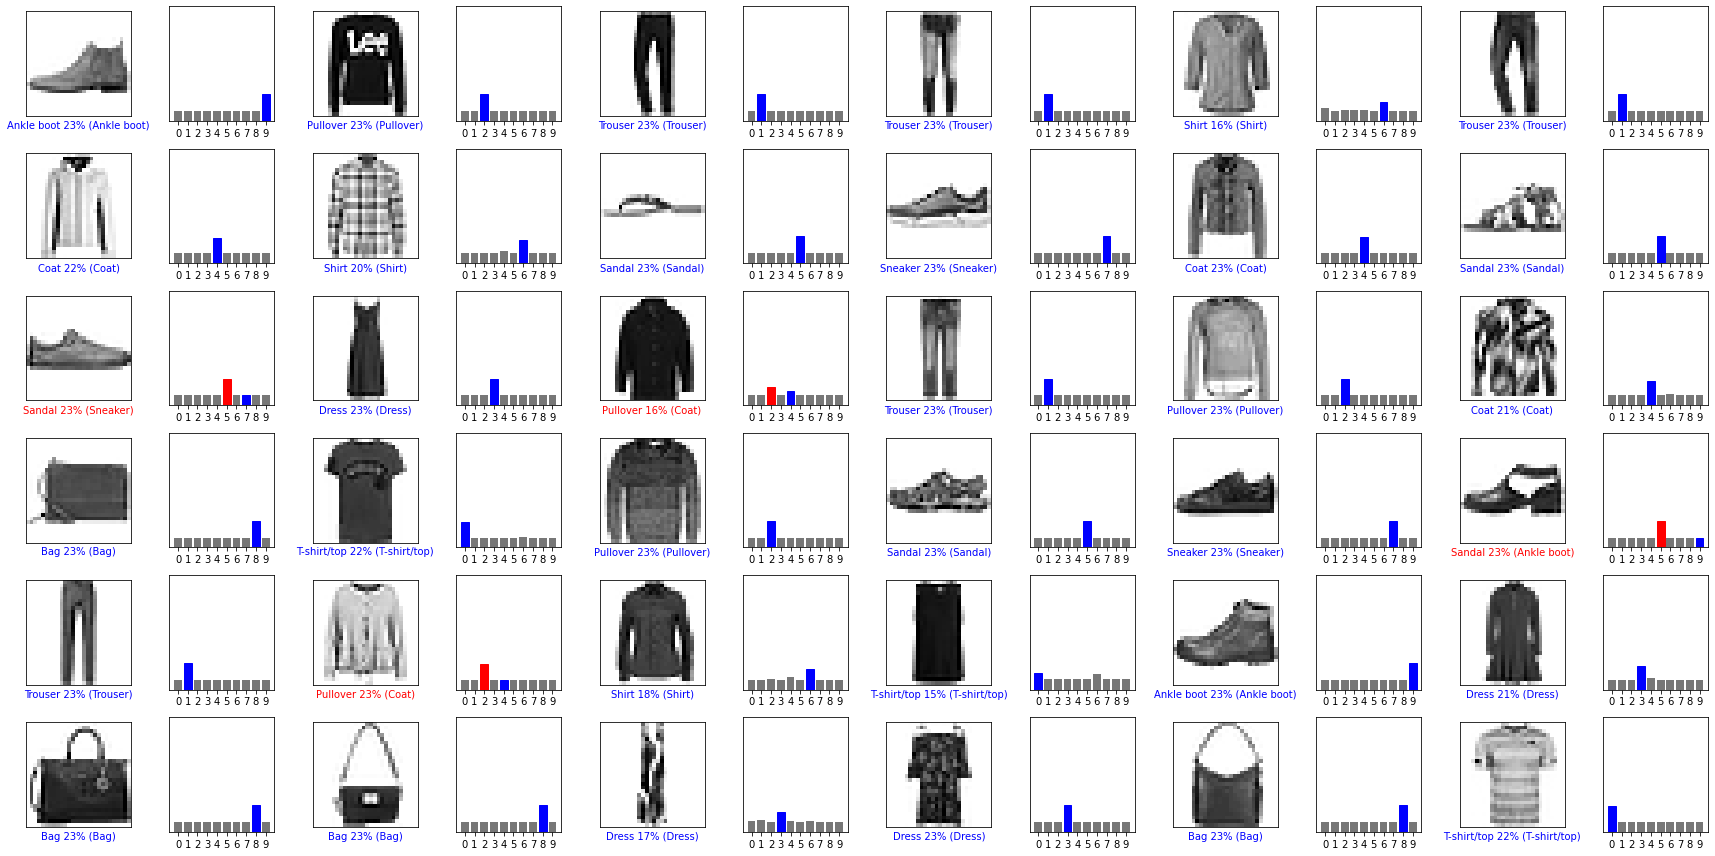

In [ ]:
import matplotlib.pyplot as plt
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
##testing without any batchnormalization

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),

    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_1', values=[5, 10]), strides=(1,1), padding='valid'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
  
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_2', values=[5, 10]), strides=(1,1), padding='valid'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_3', values=[5, 10]), strides=(1,1), padding='valid'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'
    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_1', values = [0.001, 0.1, 0.5])
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'

    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_2', values = [0.001, 0.1, 0.5])
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search_3_2=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_3_3',project_name="Mnist Fashion_3_3")

In [ ]:
tuner_search_3_2.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 02m 27s]
val_accuracy: 0.8940555453300476

Best val_accuracy So Far: 0.8940555453300476
Total elapsed time: 00h 19m 06s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search_3_2.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 48)        1248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 32)        13856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0

In [ ]:
model.fit(train_images, train_labels, epochs=20, validation_split=0.3, initial_epoch=10)

Epoch 11/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2949 - accuracy: 0.8930 - val_loss: 0.3113 - val_accuracy: 0.8897
Epoch 12/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2877 - accuracy: 0.8972 - val_loss: 0.3066 - val_accuracy: 0.8888
Epoch 13/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2857 - accuracy: 0.8970 - val_loss: 0.2954 - val_accuracy: 0.8924
Epoch 14/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2756 - accuracy: 0.9000 - val_loss: 0.2898 - val_accuracy: 0.8938
Epoch 15/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2710 - accuracy: 0.9008 - val_loss: 0.2916 - val_accuracy: 0.8952
Epoch 16/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2674 - accuracy: 0.9016 - val_loss: 0.3112 - val_accuracy: 0.8898
Epoch 17/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2656 - accuracy: 0.9037 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3213 - accuracy: 0.8923

Test accuracy: 0.892300009727478


In [ ]:
#now trying it with less conv2d layer

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_1', values=[5, 10]), strides=(1,1), padding='valid'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_2', values=[5, 10]), strides=(1,1), padding='valid'
    ),
     
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'
    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_1', values = [0.001, 0.1, 0.5])
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'

    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_2', values = [0.001, 0.1, 0.5])
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search_4_2=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_4_3',project_name="Mnist Fashion_4_3")

In [ ]:
tuner_search_4_2.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 02m 22s]
val_accuracy: 0.10133333504199982

Best val_accuracy So Far: 0.8942221999168396
Total elapsed time: 00h 16m 47s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search_4_2.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 112)       1120      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 112)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 48)        134448    
_________________________________________________________________
batch_normalization_1 (Batch (None, 19, 19, 48)        192       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0

In [ ]:
model.fit(train_images, train_labels, epochs=20, validation_split=0.3, initial_epoch=10)

Epoch 11/20
1313/1313 [==============================] - 24s 18ms/step - loss: 0.2270 - accuracy: 0.9142 - val_loss: 0.2857 - val_accuracy: 0.9001
Epoch 12/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.2142 - accuracy: 0.9197 - val_loss: 0.2953 - val_accuracy: 0.8967
Epoch 13/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.2092 - accuracy: 0.9207 - val_loss: 0.2898 - val_accuracy: 0.8983
Epoch 14/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.2042 - accuracy: 0.9228 - val_loss: 0.3466 - val_accuracy: 0.8922
Epoch 15/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1916 - accuracy: 0.9273 - val_loss: 0.3219 - val_accuracy: 0.8900
Epoch 16/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1876 - accuracy: 0.9286 - val_loss: 0.3409 - val_accuracy: 0.8825
Epoch 17/20
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1806 - accuracy: 0.9316 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3450 - accuracy: 0.8943

Test accuracy: 0.8942999839782715


In [ ]:
## changing more parameters

In [9]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_1', values=[10,15]), strides=(2,2), padding='same'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_2', values=[10, 15]), strides=(2,2), padding='same'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_3', values=[10, 15]), strides=(2,2), padding='same'
    ),
     
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dropout(
        rate=0.5
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu'

    ),
    keras.layers.Dropout(
        rate=0.5
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [10]:
tuner_search_5_4=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_5_3',project_name="Mnist Fashion_5_3")

In [11]:
tuner_search_5_4.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 04m 23s]
val_accuracy: 0.7761111259460449

Best val_accuracy So Far: 0.8824999928474426
Total elapsed time: 00h 21m 03s
INFO:tensorflow:Oracle triggered exit


In [13]:
model=tuner_search_5_4.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 112)       2912      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 112)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        179264    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 48)          2

In [15]:
loss, accuracy =model.evaluate(test_images, test_labels)
print(loss, accuracy)


313/313 [==============================] - 3s 8ms/step - loss: 0.3593 - accuracy: 0.8768
0.359272301197052 0.876800000667572


In [ ]:
## using previous model where i have achieved 92% accuracy now i will be changing the maxpooling

In [16]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), #here we are trying to give the values in our filter matrix int means selecting ranges of values
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), #hp.choice means kisi eik ko pick kro
        activation='relu',
        padding='same',
        input_shape=(28,28,1)
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_1', values=[5, 10]), strides=(1,1), padding='same'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_2', values=[5, 10]), strides=(1,1), padding='same'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu',
        padding='same'
    ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(
        pool_size=hp.Choice('pooling_size_3', values=[5, 10]), strides=(1,1), padding='same'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'
    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_1', values = [0.001, 0.1, 0.5])
    ),
     keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
        activation='relu',
        kernel_initializer='he_uniform'

    ),
    keras.layers.Dropout(
        rate=hp.Choice('dropout_2', values = [0.001, 0.1, 0.5])
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [17]:
tuner_search_6_4=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output_6_4',project_name="Mnist Fashion_6_4")

In [18]:
tuner_search_6_4.search(train_images,train_labels,epochs=10,validation_split=0.3)

Trial 5 Complete [00h 04m 23s]
val_accuracy: 0.10127777606248856

Best val_accuracy So Far: 0.8909444212913513
Total elapsed time: 00h 28m 06s
INFO:tensorflow:Oracle triggered exit


In [19]:
model=tuner_search_6_4.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 48)        480       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 48)        192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        13856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 48)        3

In [20]:
loss, accuracy =model.evaluate(test_images, test_labels)
print(loss, accuracy)


313/313 [==============================] - 3s 8ms/step - loss: 0.3297 - accuracy: 0.8805
0.32965147495269775 0.8805000185966492
